<a href="https://colab.research.google.com/github/LuisDAndrade/Basic-Computing/blob/main/III_Second_Order_Sub_Adjusted_to_First_Order%F0%9F%93%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***III. Simulation of Transfer Functions. Second Order Sub-Adjusted to First Order📊***

**Professor: Dr. Martín Montes Rivera 👨🏻‍🏫**


**Student: Luis Bryant Díaz Andrade 🧑🏻‍💻**

*Date: February 20th, 2023*

In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import control as cn
import matplotlib.pyplot as plt
from math import log

In [11]:
k = 2.5


t15 = 1.8
t45 = 1.9
t75 = 2.1

x = (t45-t15)/(t75-t15)
lm = (0.0805 - 5.547 * ((0.475-x)**2))/(x-0.356)

f2 = 0.708*(2.811)**2
f3 = 0.922*(1.66)**2
wn = f2/(t75-t15)
tm = t45-(f3/wn)

tau1 = (lm + (np.sqrt((lm**2)-1)))/wn
tau2 = (lm - (np.sqrt((lm**2)-1)))/wn

st = cn.tf([1,0],[0,1])

tf = k / ((tau1*st+1)*(tau2*st+1))

ordend = 10
numd, dend = cn.pade(tm,ordend)
delay = cn.tf(numd,dend)
system_delayed = tf*delay



In [12]:
num = [k]
den=[tau1*tau2,tau1+tau2,1]

cn.tf(num,den)

TransferFunction(array([2.5]), array([0.00287563, 0.14585276, 1.        ]))

In [13]:
tstart =0
tend = 17
sample = 0.001
time = np.arange(tstart,tend+sample, sample)
input2 = np.ones(time.shape)
time, yout = cn.step_response(system_delayed,time)

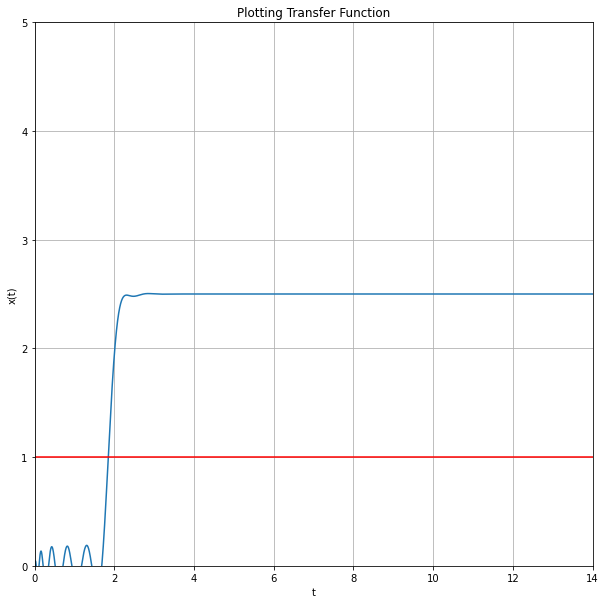

In [14]:
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.plot(time,yout)
ax.plot(input2,'r')
ax.set_title('Plotting Transfer Function')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.axis([0,14,0,5])
ax.grid()
plt.show() 